enter the pressure at point 1: 7380
enter the Temp at point 1: 313


-1.0


enter the pressure at point 2: 238000
enter the temp at point 5: 493


  Step    temperature    pressure    entropy          enthalpy    density    specfic_gravity
------  -------------  ----------  ---------  ----------------  ---------  -----------------
     1        313            7380    570.399  166906            992.232           0.00100783
     2        317.789      238000    633.777  187127            990.423           0.00100967
     3        398.948      238000   1590.07   528473            938.362           0.00106569
     4        398.948      238000   7068.86        2.71423e+06    1.32881         0.752551
     5        493          238000   7508.02        2.90908e+06    1.05708         0.946
     6        313            7380   7508.02        2.33934e+06  992.232           0.00100783
--------------------------------------------------------------
heat input= 122977.35800000004
mdot= 0.05714009595188522
turbine work= 132202.6893141863
pump work= 1650.6332886399832
cycle work= 130552.05602554634
cycle efficiency= 1.0615942491263008


CompletedProcess(args=['python', 'receiver_script.py', 'Hello, receiver script!'], returncode=2)

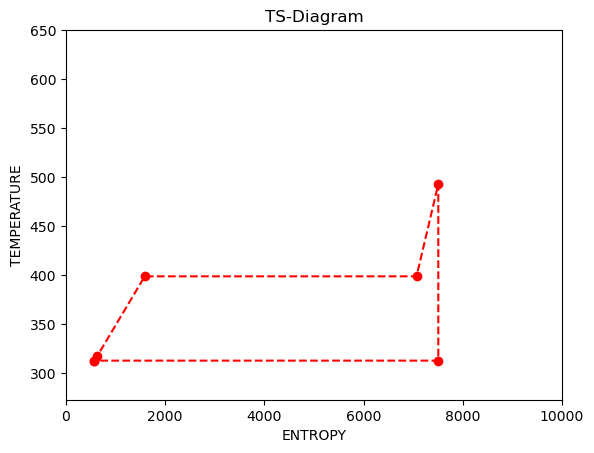

In [1]:
%reset -f
from numpy import *
import matplotlib.pyplot as PT
import CoolProp.CoolProp as CP
from tabulate import tabulate
import subprocess

P1=float(input("enter the pressure at point 1:"))
T1=float(input("enter the Temp at point 1:"))
S1=CP.PropsSI('S', 'T', T1, 'P', P1, 'water')
#print(S1)
H1=CP.PropsSI('H', 'T', T1, 'P', P1, 'water')
D1=CP.PropsSI('D', 'P', P1, 'T', T1, 'water')
SV1 = 1/D1
Q1=CP.PropsSI('Q', 'T', T1, 'S', S1, 'water')
print(Q1)
#print(D1)
#print(SV1)
#print(H1)

S2=S1/.90
P2=float(input("enter the pressure at point 2:"))
T2=CP.PropsSI('T', 'S', S2, 'P', P2, 'water')
#print(T2)
H2=CP.PropsSI('H', 'T', T2, 'P', P2, 'water')
D2=CP.PropsSI('D', 'P', P2, 'T', T2, 'water')
SV2 = 1/D2
#print(D2)
#print(SV2)
#print(H2)

P3=P2
S3=CP.PropsSI('S', 'Q', 0, 'P', P3, 'water')
#print(S3)
T3=CP.PropsSI('T', 'S', S3, 'P', P3, 'water')
#print(T3)
H3=CP.PropsSI('H', 'T', T3, 'Q', 0, 'water') #note
D3=CP.PropsSI('D', 'Q', 0, 'T', T3, 'water') #note
SV3 = 1/D3
#print(D3)
#print(H3)

P4=P3
T4=T3
S4=CP.PropsSI('S', 'T', T4, 'Q', 1, 'water')
#print(S4)
H4=CP.PropsSI('H', 'T', T4, 'Q', 1, 'water')
D4=CP.PropsSI('D', 'P', P4, 'Q', 1, 'water')
SV4 = 1/D4
#print(D1)
#print(SV1)
#print(H4)

P5=P4
T5=float(input("enter the temp at point 5:"))
S5=CP.PropsSI('S', 'T', T5, 'P', P4, 'water')
#print(S5)
H5=CP.PropsSI('H', 'T', T5, 'P', P5, 'water')
D5=CP.PropsSI('D', 'P', P5, 'T', T5, 'water')
SV5 = 1/D5
#print(H5)

S6=S5
P6=P1
T6=T1
H6=CP.PropsSI('H', 'S', S6, 'P', P6, 'water')
D6=CP.PropsSI('D', 'P', P6, 'T', T6, 'water')
SV6 = 1/D6
#print(D6)
#print(H6)

print(tabulate([["1",T1,P1,S1,H1,D1,SV1],["2",T2,P2,S2,H2,D2,SV2],["3",T3,P3,S3,H3,D3,SV3],["4",T4,P4,S4,H4,D4,SV4],["5",T5,P5,S5,H5,D5,SV5],["6",T6,P6,S6,H6,D6,SV6]], headers=["Step","temperature","pressure","entropy","enthalpy","density","specfic_gravity"]))

print("--------------------------------------------------------------")

N_P=.70
N_T=.85
HS2=1280565.3
HS1=1029591.1
msdot=.49
WS=msdot*(HS2-HS1)
mdot=(WS/(H6-H2))
Wp=mdot*(H2-H1)/N_P
Wt=mdot*(H5-H2)*N_T
W=Wt-Wp
print("heat input=",WS)
print("mdot=",mdot)
print("turbine work=",Wt)
print("pump work=",Wp)
print("cycle work=",W)
n=W/WS
print("cycle efficiency=",n)

x=[S1,S2,S3,S4,S5,S6,S1]
y=[T1,T2,T3,T4,T5,T6,T1]
PT.plot(x,y,marker='o',color='red', linestyle='dashed')
PT.ylim(273.15,650)
PT.xlim(0,10000)
PT.xlabel('ENTROPY')
PT.ylabel('TEMPERATURE')
PT.title('TS-Diagram')


data = "Hello, receiver script!"
subprocess.run(["python", "receiver_script.py", data])
